In [91]:
import math
import matplotlib.pyplot as plt
import numpy as np

Multiplicative D
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive I
Additive

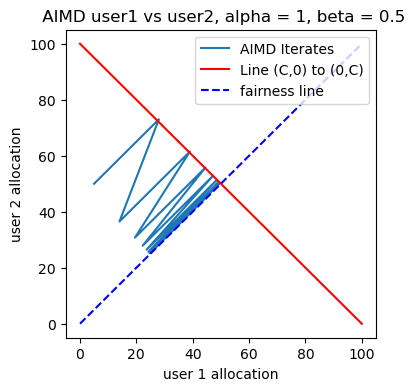

In [92]:
ITERATESMAX = 200 # You can adjust this value as needed
C = 100 # Adjust C value as needed
alpha = 1 # Adjust alpha value as needed
beta = 0.5 # Adjust alpha value as needed
exponent1 = 2 # Adjust exponent1 value as needed
exponent2 = 0.5 # Adjust exponent2 value as needed
x1 = 10
x2 = 100
alpha1 = 0
alpha2 = 0
x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        # Additive increase phase
        print('Additive I')
        alpha1 = alpha              #alpha * np.power(x1, exponent1)
        alpha2 = alpha              #alpha * np.log(x2 + 1)
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        # Simulate network condition (for example, congestion)
        print('Multiplicative D')
        beta1 = beta                #exponent1
        beta2 = beta                #exponent2
        x1 = x1 * beta1
        x2 = x2 * beta2
     
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
# Display the final values
print("Final x1:", x1)
print("Final x2:", x2)
plt.figure(figsize=(4, 4))
plt.plot(x1_values,x2_values, label='AIMD Iterates')
plt.plot([C,0], [0,C], color='red', label='Line (C,0) to (0,C)' )
plt.plot([0,C], [0, C],"--", color='blue', label="fairness line")
plt.xlabel('user 1 allocation')
plt.ylabel('user 2 allocation')
plt.title(" AIMD user1 vs user2, alpha = 1, beta = 0.5")
plt.legend()
plt.show()

In [93]:
def AIMD(user, alpha, beta, cwnd, max_cwnd, current_sum_cwnd, rtt):
    """This function mimics the Additive Increase and Multiplicative Decrease Mechanism in TCP Congestion Control.
 
    Parameters
    ----------
    user: int-type
    This represents the unique user id.
    
    alpha: float-type
    This constant controls the rate of Additive Increase. This optimises the efficiency of the network.
    
    beta: float-type
    This constant controls the rate of Multiplicative Decrease. This optimises the fairness of the network.
    This value is between 0 (exclusive) and alpha (exclusive).
    
    With these two parameters, the network system converges to optimal network conditions where the fairness line intersects with the 
    efficiency line.
    
    cwnd: int-type
    This denotes the current window size.

    max_cwnd: int-type
    This denotes the maximum congestion window size.
    
    current_sum_cwnd: int-type
    This denotes the sum of the congestion window size of all the users.
    
    Returns
    -------
    cwnd load
    """
    if current_sum_cwnd <= max_cwnd:
        cwnd += alpha(cwnd)
        #print(f'Additive I at cwnd = {cwnd}')
    else:
        cwnd *= beta(cwnd)
        cwnd = round(cwnd,3)
        print(f'Multiplicative D at RTT = {rtt}')
    return cwnd
    

In [94]:
def plot_graph(rtt_tracker, total_no_of_users, graph_title):
    plt.figure(figsize=(6, 6))
    for user in range(total_no_of_users):
        plt.plot(rtt_tracker[user], label=f'User {user + 1}')
    plt.xlabel('Round-Trip Time (RTT)')
    plt.ylabel('Congestion Window Size (cwnd)')
    plt.title(graph_title)
    plt.legend()
    plt.show()

In [95]:
def simulate_network(total_no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, graph_title):
    rtt_tracker = np.zeros((total_no_of_users, MAXITERATIONS))
    current_cwnd_total = 0
    
    #initialise the initial cwnd size
    for index, cwnd_size in enumerate(initial_cwnd):
        rtt_tracker[index, 0] = cwnd_size
        
    for rtt in range(MAXITERATIONS):
        current_cwnd_sum = 0
        
        for user in range(total_no_of_users):  
            
            if rtt == 0:
                cwnd = rtt_tracker[user,0] #retrieve the initial cwnd value
            else:
                cwnd = rtt_tracker[user, rtt-1] #retrieve the previous cwnd value
                
            cwnd = AIMD(user, additive_increase, multiplicative_decrease, cwnd, max_cwnd, current_cwnd_total, rtt)
            rtt_tracker[user,rtt] = cwnd
            current_cwnd_sum += cwnd
            
        current_cwnd_total = current_cwnd_sum
    print(rtt_tracker)
    plot_graph(rtt_tracker, total_no_of_users, graph_title)
    return rtt_tracker

            
        

## Experiment 1 

## alpha = 1 and beta = 0.5

In [96]:
#basic alpha = 1, beta = 0.5
def additive_increase(cwd):
    return 1

def multiplicative_decrease(cwd):
    return 0.5

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 77
Multiplicative D at RTT = 77
Multiplicative D at RTT = 103
Multiplicative D at RTT = 103
Multiplicative D at RTT = 129
Multiplicative D at RTT = 129
Multiplicative D at RTT = 155
Multiplicative D at RTT = 155
Multiplicative D at RTT = 181
Multiplicative D at RTT = 181
[[ 11.      5.5     6.5     7.5     8.5     9.5    10.5    11.5    12.5
   13.5    14.5    15.5    16.5    17.5    18.5    19.5    20.5    21.5
   22.5    23.5    24.5    25.5    26.5    27.5    28.5    14.25   15.25
   16.25   17.25   18.25   19.25   20.25   21.25   22.25   23.25   24.25
   25.25   26.25   27.25   28.25   29.25   30.25   31.25   32.25   33.25
   34.25   35.25   36.25   37.25   38.25   39.25   19.625  20.625  21.625
   22.625  23.625  24.625  25.625  26.625  27.625  28.625  29.625  30.625
   31.625  32.625  

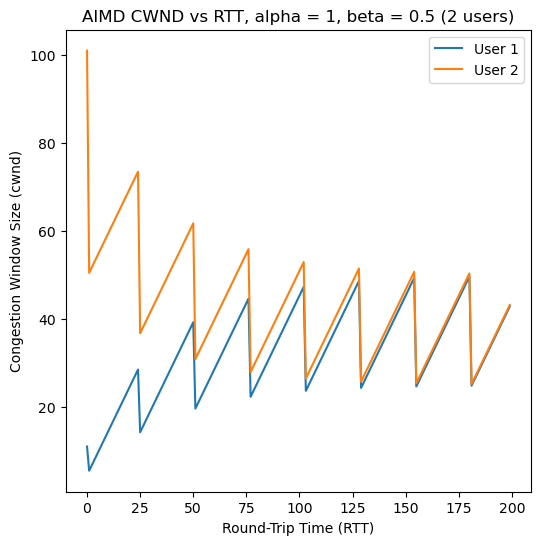

In [97]:
no_of_users = 2 #user 1 and 2
initial_cwnd = [10, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 100

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha = 1, beta = 0.5 (2 users)")

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 51
Multiplicative D at RTT = 77
Multiplicative D at RTT = 77
Multiplicative D at RTT = 77
Multiplicative D at RTT = 77
Multiplicative D at RTT 

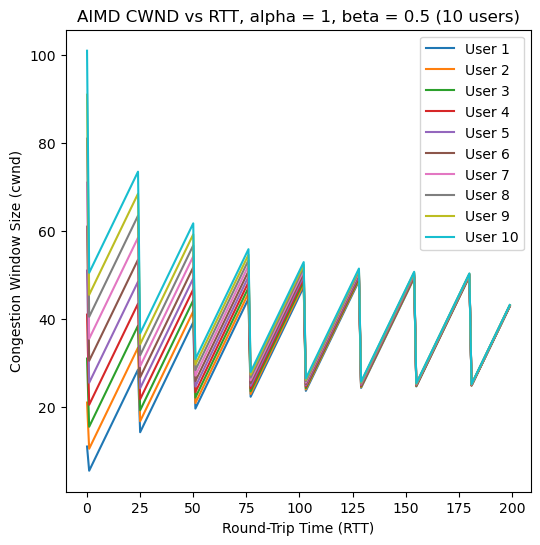

In [98]:
no_of_users = 10 #user 1,2,3,4,5,6,7,8,9
initial_cwnd = [10, 20, 30 , 40, 50, 60, 70, 80, 90, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 500

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha = 1, beta = 0.5 (10 users)")

## EXPERIMENT 2

### alpha with logarithm increase, beta=0.5

In [99]:
#logarithmic alpha, beta = 0.5
def additive_increase(cwd):
    return max(math.log(cwd+1,2),1)

def multiplicative_decrease(cwd):
    return 0.5

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 7
Multiplicative D at RTT = 7
Multiplicative D at RTT = 13
Multiplicative D at RTT = 13
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 31
Multiplicative D at RTT = 31
Multiplicative D at RTT = 37
Multiplicative D at RTT = 37
Multiplicative D at RTT = 43
Multiplicative D at RTT = 43
Multiplicative D at RTT = 49
Multiplicative D at RTT = 49
Multiplicative D at RTT = 55
Multiplicative D at RTT = 55
Multiplicative D at RTT = 61
Multiplicative D at RTT = 61
Multiplicative D at RTT = 67
Multiplicative D at RTT = 67
Multiplicative D at RTT = 73
Multiplicative D at RTT = 73
Multiplicative D at RTT = 79
Multiplicative D at RTT = 79
Multiplicative D at RTT = 85
Multiplicative D at RTT = 85
Multiplicative D at RTT = 91
Multiplicative D at RTT = 91
Multiplicative D at RTT = 97
Multiplicative D at RTT = 97
Multiplicative D a

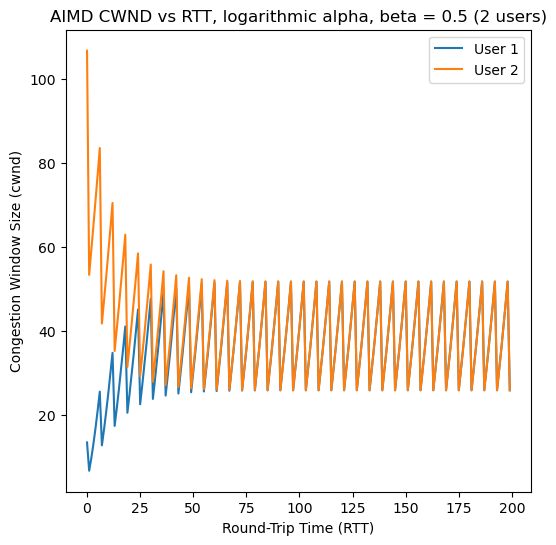

In [100]:
no_of_users = 2 #user 1 and 2
initial_cwnd = [10, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 100

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, logarithmic alpha, beta = 0.5 (2 users)")

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 18
Multiplicative D at RTT = 18
Multiplicative D at RTT = 18
Multiplicative D at RTT = 18
Multiplicative D at RTT = 18
Multi

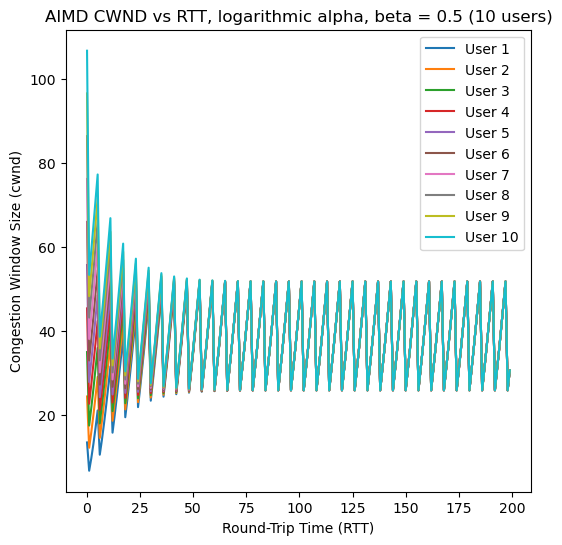

In [101]:
no_of_users = 10 #user 1,2,3,4,5,6,7,8,9
initial_cwnd = [10, 20, 30 , 40, 50, 60, 70, 80, 90, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 500

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, logarithmic alpha, beta = 0.5 (10 users)")

## Experiment 3

### alpha = 1, beta is non linear decrease

In [102]:
#alpha = 1, beta = 0.25
def additive_increase(cwd):
    return 1

def multiplicative_decrease(cwd):
    return 1-(1/math.log(cwd+1,2))

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 15
Multiplicative D at RTT = 15
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 34
Multiplicative D at RTT = 34
Multiplicative D at RTT = 44
Multiplicative D at RTT = 44
Multiplicative D at RTT = 54
Multiplicative D at RTT = 54
Multiplicative D at RTT = 64
Multiplicative D at RTT = 64
Multiplicative D at RTT = 74
Multiplicative D at RTT = 74
Multiplicative D at RTT = 83
Multiplicative D at RTT = 83
Multiplicative D at RTT = 93
Multiplicative D at RTT = 93
Multiplicative D at RTT = 103
Multiplicative D at RTT = 103
Multiplicative D at RTT = 113
Multiplicative D at RTT = 113
Multiplicative D at RTT = 123
Multiplicative D at RTT = 123
Multiplicative D at RTT = 133
Multiplicative D at RTT = 133
Multiplicative D at RTT = 143
Multiplicative D at RTT = 143
Multiplicative D at RTT = 153
Multiplicative D at RTT = 153
Multip

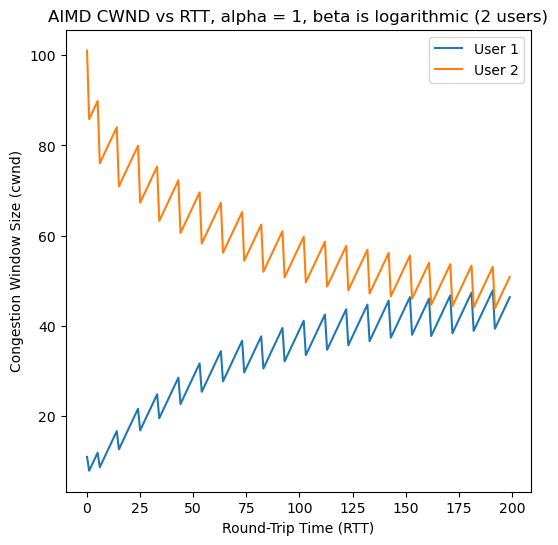

In [103]:
no_of_users = 2 #user 1 and 2
initial_cwnd = [10, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 100

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha = 1, beta is logarithmic (2 users)")

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 6
Multiplicative D at RTT = 16
Multiplicative D at RTT = 16
Multiplicative D at RTT = 16
Multiplicative D at RTT = 16
Multiplicative D at RTT = 16
Multiplicative D at RTT = 16
Multiplicative D at RTT = 16
Multiplicative D at RTT = 16
Multiplicative D at RTT = 16
Multiplicative D at RTT = 16
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multiplicative D at RTT = 25
Multi

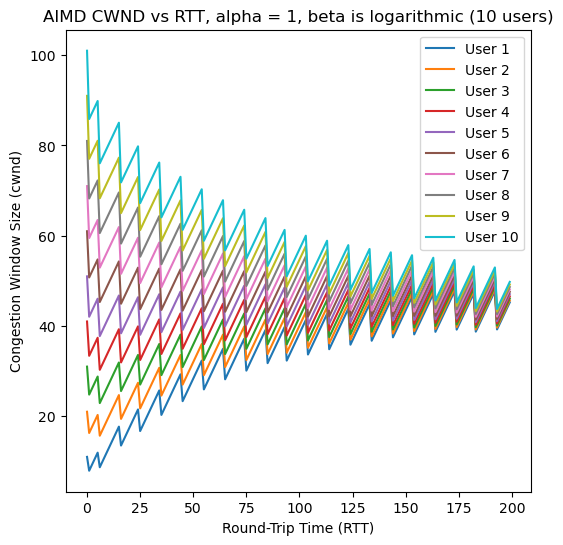

In [104]:
no_of_users = 10 #user 1,2,3,4,5,6,7,8,9
initial_cwnd = [10, 20, 30 , 40, 50, 60, 70, 80, 90, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 500

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha = 1, beta is logarithmic (10 users)")

## Experiment 4

### alpha is exponential, beta = 0.5

In [105]:
#alpha is exponential, beta = 0.5
def additive_increase(cwd):
    return 0.5*math.pow(cwd,0.5)

def multiplicative_decrease(cwd):
    return 0.5

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 10
Multiplicative D at RTT = 10
Multiplicative D at RTT = 20
Multiplicative D at RTT = 20
Multiplicative D at RTT = 30
Multiplicative D at RTT = 30
Multiplicative D at RTT = 40
Multiplicative D at RTT = 40
Multiplicative D at RTT = 49
Multiplicative D at RTT = 49
Multiplicative D at RTT = 59
Multiplicative D at RTT = 59
Multiplicative D at RTT = 69
Multiplicative D at RTT = 69
Multiplicative D at RTT = 78
Multiplicative D at RTT = 78
Multiplicative D at RTT = 88
Multiplicative D at RTT = 88
Multiplicative D at RTT = 97
Multiplicative D at RTT = 97
Multiplicative D at RTT = 107
Multiplicative D at RTT = 107
Multiplicative D at RTT = 117
Multiplicative D at RTT = 117
Multiplicative D at RTT = 126
Multiplicative D at RTT = 126
Multiplicative D at RTT = 136
Multiplicative D at RTT = 136
Multiplicative D at RTT = 145
Multiplicative D at RTT = 145
Multiplicative D at RTT = 155
Multiplicative D at RTT = 155
Mult

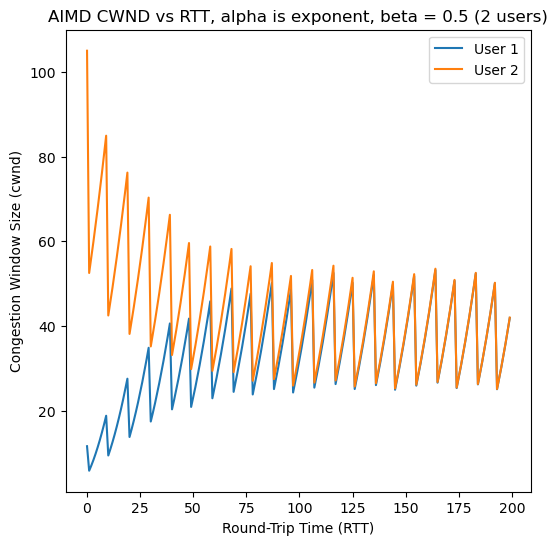

In [106]:
no_of_users = 2 #user 1 and 2
initial_cwnd = [10, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 100

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha is exponent, beta = 0.5 (2 users)")

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 9
Multiplicative D at RTT = 9
Multiplicative D at RTT = 9
Multiplicative D at RTT = 9
Multiplicative D at RTT = 9
Multiplicative D at RTT = 9
Multiplicative D at RTT = 9
Multiplicative D at RTT = 9
Multiplicative D at RTT = 9
Multiplicative D at RTT = 9
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 19
Multiplicative D at RTT = 29
Multiplicative D at RTT = 29
Multiplicative D at RTT = 29
Multiplicative D at RTT = 29
Multiplicative D at RTT = 29
Multi

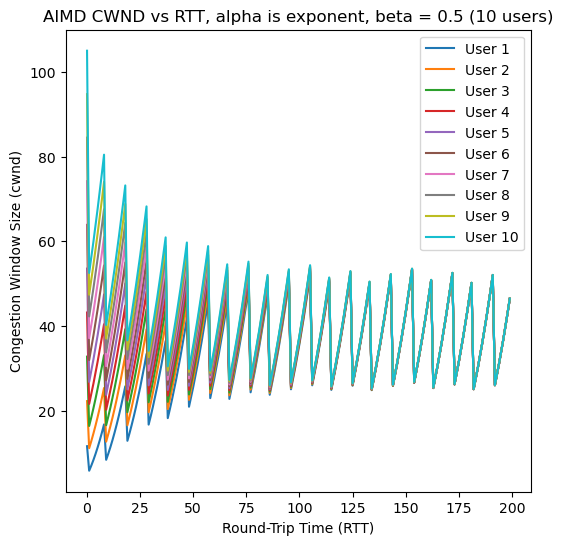

In [107]:
no_of_users = 10 #user 1,2,3,4,5,6,7,8,9
initial_cwnd = [10, 20, 30 , 40, 50, 60, 70, 80, 90, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 500

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha is exponent, beta = 0.5 (10 users)")

## Experiment 5

### alpha = 1, beta decreases exponentially

In [117]:
#alpha is 1, beta is exponential
def additive_increase(cwd):
    return 1

def multiplicative_decrease(cwd):
    return 1/math.pow(cwd,0.5)

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 46
Multiplicative D at RTT = 46
Multiplicative D at RTT = 90
Multiplicative D at RTT = 90
Multiplicative D at RTT = 134
Multiplicative D at RTT = 134
Multiplicative D at RTT = 178
Multiplicative D at RTT = 178
[[ 11.      3.317   4.317   5.317   6.317   7.317   8.317   9.317  10.317
   11.317  12.317  13.317  14.317  15.317  16.317  17.317  18.317  19.317
   20.317  21.317  22.317  23.317  24.317  25.317  26.317  27.317  28.317
   29.317  30.317  31.317  32.317  33.317  34.317  35.317  36.317  37.317
   38.317  39.317  40.317  41.317  42.317  43.317  44.317  45.317  46.317
   47.317   6.879   7.879   8.879   9.879  10.879  11.879  12.879  13.879
   14.879  15.879  16.879  17.879  18.879  19.879  20.879  21.879  22.879
   23.879  24.879  25.879  26.879  27.879  28.879  29.879  30.879  31.879
   32.879  33.879  34.879  35.879  36.879  37.879  38.879  39.879  40.879
   41.879  42.879  43.879  44.879  45.879 

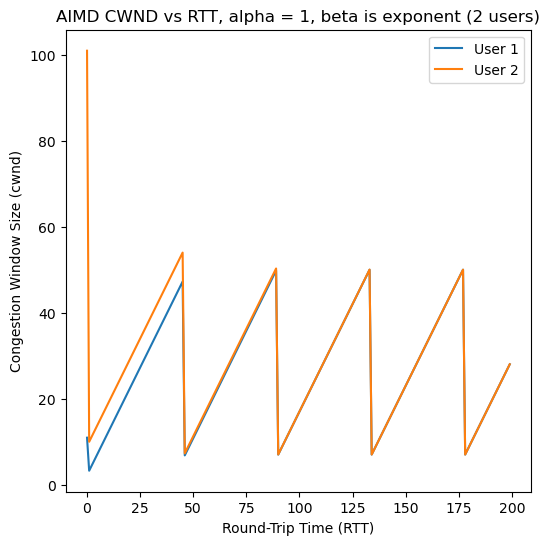

In [118]:
no_of_users = 2 #user 1 and 2
initial_cwnd = [10, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 100

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha = 1, beta is exponent (2 users)")

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 133
Multiplicative D at RTT = 133
Multiplicative D at RTT = 133
Multiplicative D at RTT = 133
Multiplicative D at 

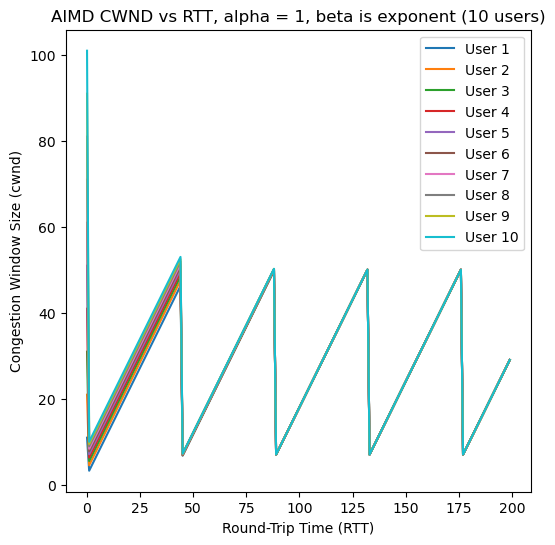

In [119]:
no_of_users = 10 #user 1,2,3,4,5,6,7,8,9
initial_cwnd = [10, 20, 30 , 40, 50, 60, 70, 80, 90, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 500

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha = 1, beta is exponent (10 users)")

## Experiment 6

### Logarithmic alpha and exponential beta

In [121]:
#alpha is logarithmic, beta is exponential
def additive_increase(cwd):
    return max(math.log(cwd+1,2),1)

def multiplicative_decrease(cwd):
    return 1/math.pow(cwd,0.5)

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 34
Multiplicative D at RTT = 34
Multiplicative D at RTT = 45
Multiplicative D at RTT = 45
Multiplicative D at RTT = 56
Multiplicative D at RTT = 56
Multiplicative D at RTT = 67
Multiplicative D at RTT = 67
Multiplicative D at RTT = 78
Multiplicative D at RTT = 78
Multiplicative D at RTT = 89
Multiplicative D at RTT = 89
Multiplicative D at RTT = 100
Multiplicative D at RTT = 100
Multiplicative D at RTT = 111
Multiplicative D at RTT = 111
Multiplicative D at RTT = 122
Multiplicative D at RTT = 122
Multiplicative D at RTT = 133
Multiplicative D at RTT = 133
Multiplicative D at RTT = 144
Multiplicative D at RTT = 144
Multiplicative D at RTT = 155
Multiplicative D at RTT = 155
Multiplicative D at RTT = 166
Multiplicative D at RTT = 166
Multiplicative D at RTT = 177
Multiplicative D at RTT = 177


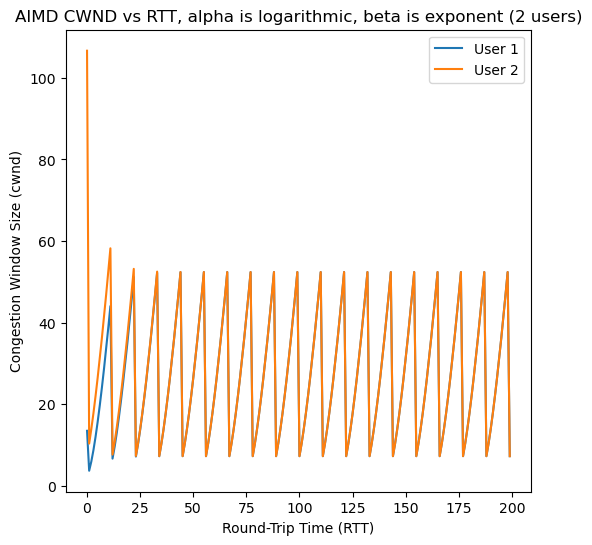

In [122]:
no_of_users = 2 #user 1 and 2
initial_cwnd = [10, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 100

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha is logarithmic, beta is exponent (2 users)")

Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 1
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 12
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 23
Multiplicative D at RTT = 34
Multiplicative D at RTT = 34
Multiplicative D at RTT = 34
Multiplicative D at RTT = 34
Multiplicative D at RTT 

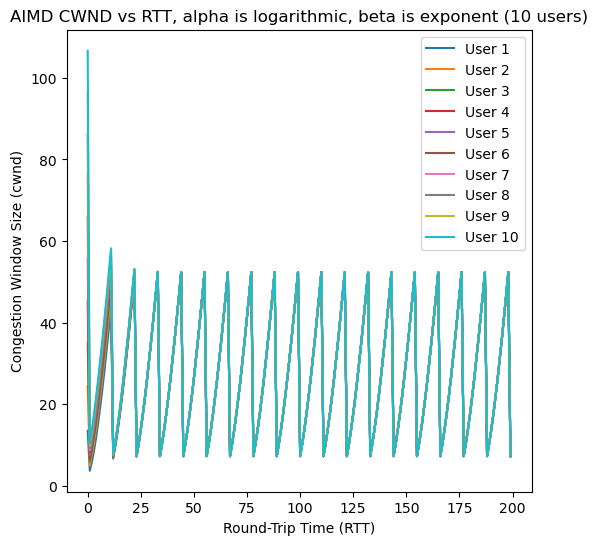

In [123]:
no_of_users = 10 #user 1,2,3,4,5,6,7,8,9
initial_cwnd = [10, 20, 30 , 40, 50, 60, 70, 80, 90, 100] #same as tutorial
MAXITERATIONS = 200
max_cwnd = 500

rtt_tracker = simulate_network(no_of_users, MAXITERATIONS, additive_increase, multiplicative_decrease, initial_cwnd, max_cwnd, "AIMD CWND vs RTT, alpha is logarithmic, beta is exponent (10 users)")